In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew

from sklearn.pipeline import make_pipeline

#### Data Preparation and Data Cleaning

In [2]:
sales_df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
len(sales_df)

9994

In [4]:
sales_df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
sales_df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
sales_df['Profit'] = sales_df['Profit'].astype('int')
sales_df['Profit'].dtypes

dtype('int64')

In [8]:
sales_df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

#### EDA

In [9]:
print("number of unique customers: ", sales_df['Customer Name'].nunique())

number of unique customers:  50


In [10]:
print("number of unique Sub Categories: ", sales_df['Sub Category'].nunique())

number of unique Sub Categories:  23


In [11]:
list(sales_df['Region'].unique())

['North', 'South', 'West', 'Central', 'East']

#### avg sales per cities

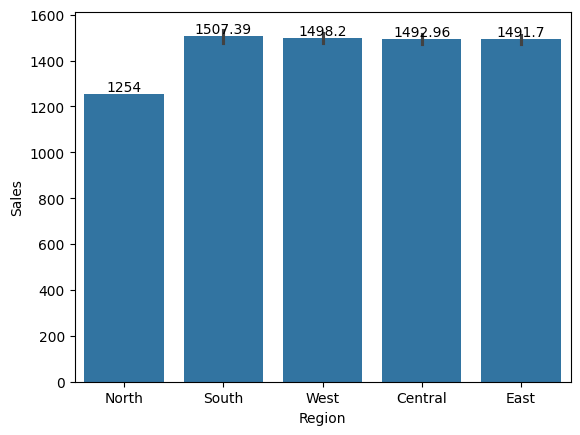

In [12]:
ax = sns.barplot(x='Region', y='Sales', data=sales_df, estimator=np.mean)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


#### total sales per categories

/tmp/ipykernel_2118/807862949.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
/tmp/ipykernel_2118/807862949.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)


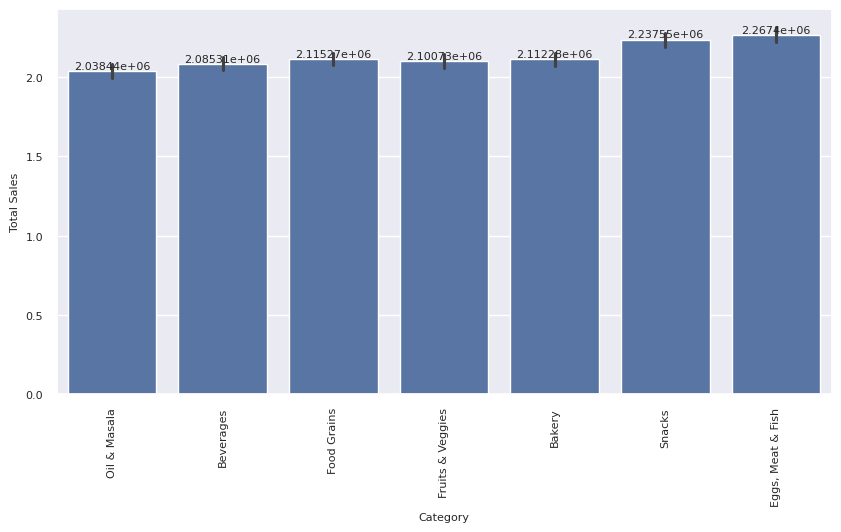

In [13]:
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.barplot(x='Category', y='Sales', data=sales_df, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
ax.set_ylabel("Total Sales", fontsize=8)
ax.set_xlabel("Category", fontsize=8)

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 8)
plt.show()

#### Top 10 Customers Sales by Volume 

In [14]:
customers_by_sales = sales_df.groupby('Customer Name')['Sales'].sum()

In [15]:
customers_sales = customers_by_sales.sort_values(ascending=False)

In [16]:
top_10_customers = customers_sales.head(10)
top_10_customers

Customer Name
Krithika    334361
Amrish      333351
Verma       331665
Arutra      325720
Vidya       321798
Vinne       319565
Shah        318588
Suresh      315973
Adavan      315341
Surya       312645
Name: Sales, dtype: int64

#### Regions making profits

In [17]:
regions_profit = sales_df.groupby('Region')['Profit'].sum()

In [18]:
regions_profit_sorted = regions_profit.sort_values(ascending = False)

In [19]:
top3_regions_profit = regions_profit_sorted.head(3)
top3_regions_profit

Region
West       1190477
East       1072967
Central     855708
Name: Profit, dtype: int64

#### Correlation Matrix

In [20]:
sales_df_numeric = sales_df[['Sales', 'Discount', 'Profit']]

In [21]:
corr = sales_df_numeric.corr()

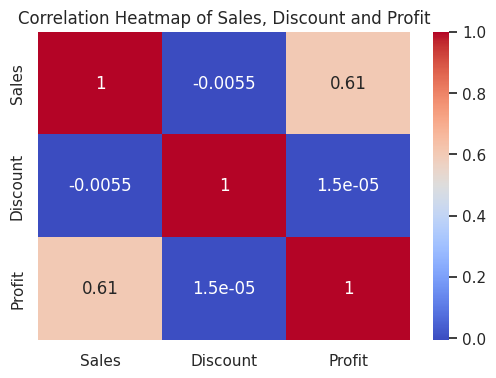

In [22]:
plt.figure(figsize = (6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Sales, Discount and Profit")
plt.show()

In [23]:
var = ['Sales','Discount','Profit']
print(sales_df[var].skew())

Sales       0.000927
Discount   -0.026487
Profit      0.767365
dtype: float64


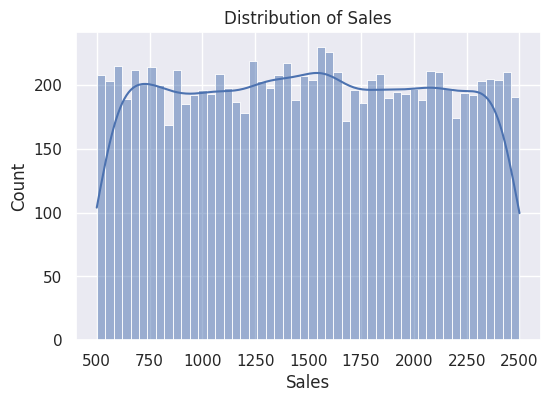

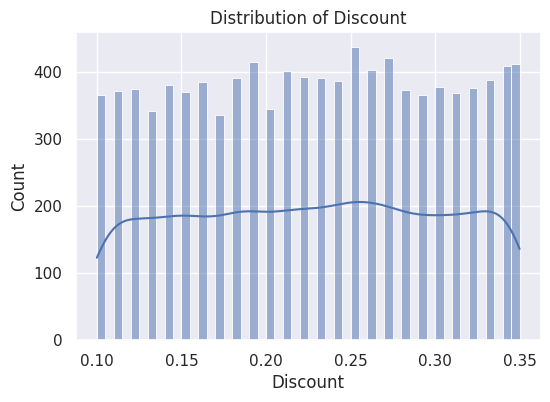

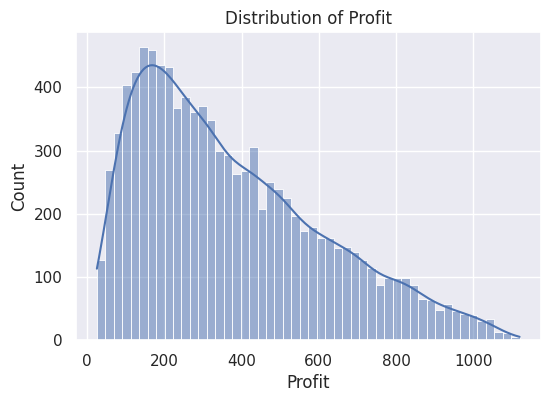

In [24]:
for var in var:
    plt.figure(figsize=(6,4))
    sns.histplot(sales_df[var], bins=50, kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()

In [25]:
skewness = skew(sales_df["Discount"])
print("Skewness:", skewness)

Skewness: -0.026482823349989908
